# Exploring Stocks Indicators

In [275]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as pp
import seaborn as sn
pp.style.use('seaborn-colorblind')

In [276]:
# Getting Data From Pinterest Stocks
ticker = yf.Ticker('MSFT')
prices = ticker.history(period='1d', start='2020-1-1', end='2020-7-1')
prices

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2020-01-02,157.91,159.85,157.46,159.74,22622100,0.0,0
2020-01-03,157.45,159.07,157.19,157.75,21116200,0.0,0
2020-01-06,156.22,158.23,155.65,158.16,20813700,0.0,0
2020-01-07,158.44,158.79,156.46,156.71,21634100,0.0,0
2020-01-08,158.06,159.92,157.08,159.21,27746500,0.0,0
...,...,...,...,...,...,...,...
2020-06-24,201.60,203.25,196.56,197.84,36740600,0.0,0
2020-06-25,197.80,200.61,195.47,200.34,27803900,0.0,0
2020-06-26,199.73,199.89,194.88,196.33,54675800,0.0,0


In [277]:
# Adding Moving Averages (5, 10, 20, 50)
prices['MA5'] = prices.Close.rolling(5).mean()
prices['MA10'] = prices.Close.rolling(10).mean()
prices['MA20'] = prices.Close.rolling(20).mean()
prices['MA50'] = prices.Close.rolling(50).mean()

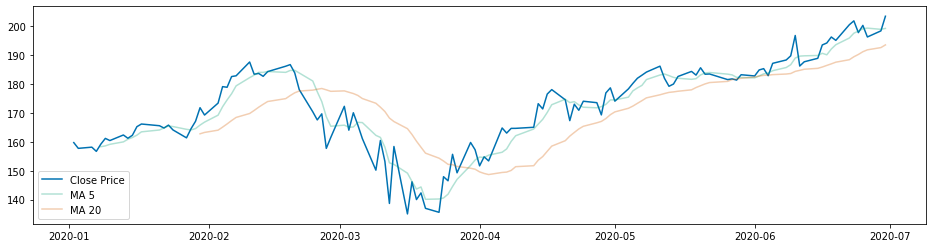

In [278]:
# Let's plot prices and moving averages
pp.figure(figsize = (16,4))
pp.plot(prices.Close, label = 'Close Price')
pp.plot(prices.MA5, label = 'MA 5', alpha = 0.3)
#pp.plot(prices.MA10, label = 'MA 10', alpha = 0.3)
pp.plot(prices.MA20, label = 'MA 20', alpha = 0.3)
#pp.plot(prices.MA50, label = 'MA 50', alpha = 0.3)
pp.legend(loc = 'lower left')

In [279]:
# Standard deviation (increase in volatiliy)
prices['VOLAT10'] = np.sqrt(prices.Close.rolling(10).var())/prices.Close.rolling(10).mean()
prices['VOLAT20'] = np.sqrt(prices.Close.rolling(20).var())/prices.Close.rolling(20).mean()
prices['VOLAT50'] = np.sqrt(prices.Close.rolling(50).var())/prices.Close.rolling(50).mean()

0.007481471366135164 0.06621788862739399
0.010548898110306258 0.06621788862739399
0.04286030733177107 0.06621788862739399


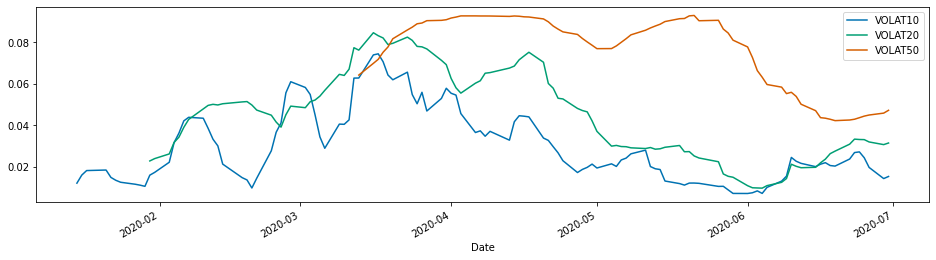

In [280]:
# Plotting the distribution of volatility
pp.figure(figsize = (16,4))
prices.VOLAT10.plot(label = 'VOLAT10')
prices.VOLAT20.plot(label = 'VOLAT20')
prices.VOLAT50.plot(label = 'VOLAT50')
pp.legend(loc = 'upper right')

print(prices.VOLAT10.quantile(0.025), prices.VOLAT10.quantile(0.975))
print(prices.VOLAT20.quantile(0.025), prices.VOLAT10.quantile(0.975))
print(prices.VOLAT50.quantile(0.025), prices.VOLAT10.quantile(0.975))

In [281]:
# Calculating the daily growth of stock
prices['daily_growth'] = prices.Close / prices.Close.shift(1) - 1
prices['daily_growth_yesterday'] = prices.Close.shift(2) / prices.Close.shift(1) - 1
prices = prices.dropna()
prices

,Open,High,Low,Close,Volume,Dividends,Stock Splits,MA5,MA10,MA20,MA50,VOLAT10,VOLAT20,VOLAT50,daily_growth,daily_growth_yesterday
Date,,,,,,,,,,,,,,,,
2020-03-13,147.09,161.46,140.34,158.39,92727400,0.0,0,152.186,159.430,167.0305,168.0022,0.062771,0.076194,0.064189,0.142208,0.104781
2020-03-16,139.61,148.94,134.63,135.04,87905900,0.0,0,149.154,155.703,164.5660,167.5082,0.073896,0.084569,0.069831,-0.147421,-0.124503
2020-03-17,139.61,147.09,134.63,146.16,81059800,0.0,0,146.292,153.914,162.5640,167.2764,0.074421,0.083139,0.071769,0.082346,0.172912
2020-03-18,137.62,145.59,134.65,140.01,81593200,0.0,0,143.654,150.907,160.2265,166.9134,0.070628,0.082060,0.075181,-0.042077,-0.076081
2020-03-19,142.37,149.73,138.61,142.31,85922700,0.0,0,144.382,148.557,158.1465,166.6254,0.064213,0.078900,0.077699,0.016427,0.043925
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-06-24,201.60,203.25,196.56,197.84,36740600,0.0,0,198.358,194.255,190.2710,183.3126,0.027203,0.033169,0.043660,-0.020157,-0.006637
2020-06-25,197.80,200.61,195.47,200.34,27803900,0.0,0,199.162,195.662,191.2180,183.8914,0.024380,0.033108,0.044423,0.012636,0.020572
2020-06-26,199.73,199.89,194.88,196.33,54675800,0.0,0,199.398,196.521,191.8720,184.2870,0.019715,0.031985,0.044954,-0.020016,-0.012479


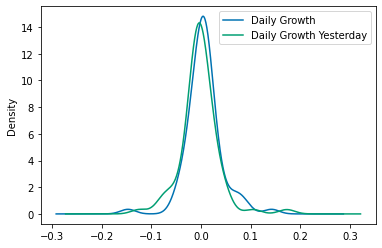

In [282]:
# Understanding distribution of price daily growth
prices.daily_growth.plot(kind = 'density', label = 'Daily Growth')
prices.daily_growth_yesterday.plot(kind = 'density', label = 'Daily Growth Yesterday')
pp.legend(loc = 'upper right')

In [283]:
prices.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 76 entries, 2020-03-13 to 2020-06-30
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Open                    76 non-null     float64
 1   High                    76 non-null     float64
 2   Low                     76 non-null     float64
 3   Close                   76 non-null     float64
 4   Volume                  76 non-null     int64  
 5   Dividends               76 non-null     float64
 6   Stock Splits            76 non-null     int64  
 7   MA5                     76 non-null     float64
 8   MA10                    76 non-null     float64
 9   MA20                    76 non-null     float64
 10  MA50                    76 non-null     float64
 11  VOLAT10                 76 non-null     float64
 12  VOLAT20                 76 non-null     float64
 13  VOLAT50                 76 non-null     float64
 14  daily_growth            

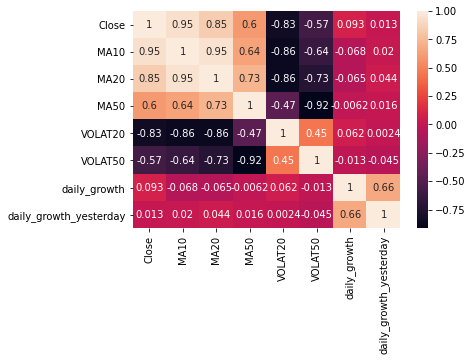

In [284]:
correl = prices[['Close','MA10','MA20','MA50','VOLAT20','VOLAT50','daily_growth','daily_growth_yesterday']].corr()
sn.heatmap(correl, annot=True)

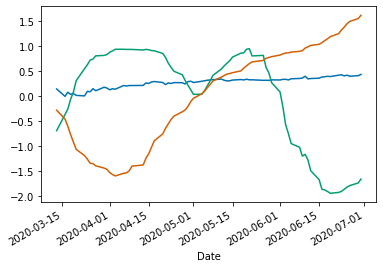

In [285]:
a = (prices.VOLAT50 - prices.VOLAT50.mean())/np.sqrt(prices.VOLAT50.var())
b = (prices.MA20 - prices.MA20.mean())/np.sqrt(prices.MA20.var())
prices.daily_growth.cumsum().plot()
a.plot()
b.plot()

In [286]:
# Price growth x volatility x MA rates
a = (prices.daily_growth - prices.daily_growth.mean())/np.sqrt(prices.daily_growth.var())
b = prices.MA5 / prices.MA20
b = (b - b.mean())/np.sqrt(b.var())
c = (prices.VOLAT20 - prices.VOLAT20.mean())/np.sqrt(prices.VOLAT20.var())

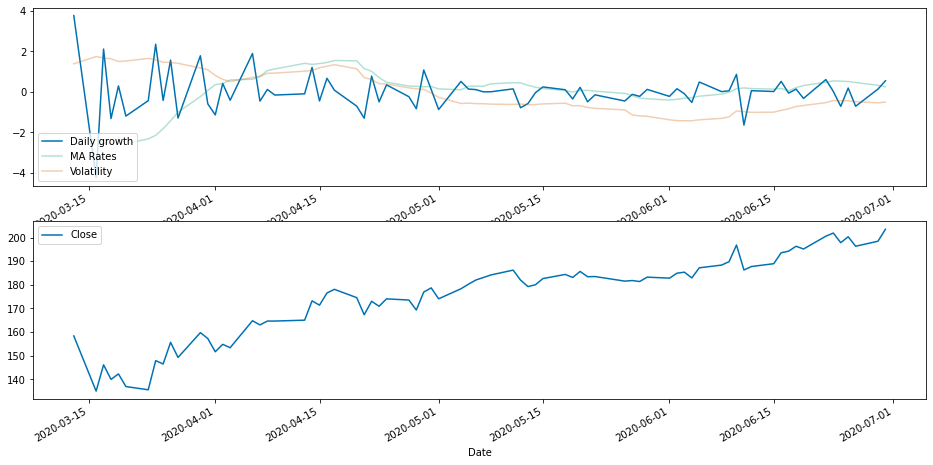

In [287]:
pp.figure(figsize = (16,8))
pp.subplot(2,1,1)
a.plot(label = 'Daily growth')
b.plot(label = 'MA Rates', alpha = 0.3)
c.plot(label = 'Volatility', alpha = 0.3)
pp.legend(loc = 'lower left')
pp.subplot(2,1,2)
prices.Close.plot()
pp.legend(loc = 'upper left')

In [288]:
# Creating buy and sell signals
buy = []
sell = []
flag = -1

for i in range(len(prices)):
    if a[i] > b[i]:
        sell.append(np.nan)
        if flag != 1:
            buy.append(prices.Close[i])
            flag = 1
        else:
            buy.append(np.nan)
    elif a[i] < b[i]:
        buy.append(np.nan)
        if flag != 0:
            sell.append(prices.Close[i])
            flag = 0
        else:
            sell.append(np.nan)
    else:
        buy.append(np.nan)
        sell.append(np.nan)

action = pd.DataFrame({'close': prices.Close, 'buy':buy, 'sell':sell})

            

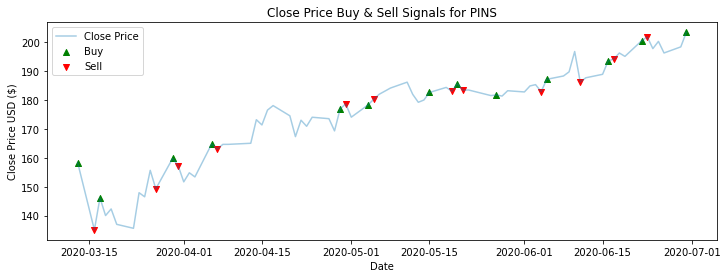

In [289]:
# Plotting actions
pp.figure(figsize = (12, 4))
pp.scatter(action.index, action['buy'], color = 'green', label = 'Buy', marker = '^', alpha = 1)
pp.scatter(action.index, action['sell'], color = 'red', label = 'Sell', marker = 'v', alpha = 1)
pp.plot(action.close, label = 'Close Price', alpha = 0.35)
pp.title('Close Price Buy & Sell Signals for PINS')
pp.xlabel('Date')
pp.ylabel('Close Price USD ($)')
pp.legend(loc = 'upper left')

In [433]:
# Let's try something different.
# Using MACD methodology, but entering the volatility aspect.

def actions(stock = 'PINS', start = '2019-01-01', end = '2020-07-04'):
    
    # Getting the data
    ticker = yf.Ticker(stock)
    prices = ticker.history(period='1d', start=start, end=end)
    
    # Calculating the indicators
    shortEMA = prices.Close.ewm(span = 12, adjust = False).mean()
    longEMA = prices.Close.ewm(span = 26, adjust = False).mean()
    MACD = shortEMA - longEMA
    signal = MACD.ewm(span = 9, adjust = False).mean()
    prices['VOLAT05'] = np.sqrt(prices.Close.rolling(5).var())/prices.Close.rolling(5).mean()
    prices['VOLAT10'] = np.sqrt(prices.Close.rolling(10).var())/prices.Close.rolling(10).mean()
    prices['VOLAT20'] = np.sqrt(prices.Close.rolling(20).var())/prices.Close.rolling(20).mean()
    prices['VOLAT50'] = np.sqrt(prices.Close.rolling(50).var())/prices.Close.rolling(50).mean()
    
    # Creating buy and sell events
    buy = []
    sell = []
    price_buy = []
    price_buy_date = []
    price_sell = []
    price_sell_date = []
    flag = -1
    long_short = []
    
    for i in range(0, len(signal)):
        
        if (MACD[i] > signal[i]) & (prices.VOLAT05[i] > prices.VOLAT05.mean()):
            sell.append(np.nan)
            long_short.append('long')
            if flag != 1:
                buy.append(prices.Close[i])
                price_buy.append(prices.Close[i])
                price_buy_date.append(prices.index[i])
                flag = 1
            else:
                buy.append(np.nan)
                
        elif (MACD[i] < signal[i]) & (prices.VOLAT05[i] > prices.VOLAT05.mean()):
            buy.append(np.nan)
            long_short.append('short')
            if flag != 0:
                sell.append(prices.Close[i])
                price_sell.append(prices.Close[i])
                price_sell_date.append(prices.index[i])
                flag = 0
            else:
                sell.append(np.nan)
        else:
            buy.append(np.nan)
            sell.append(np.nan)
            long_short.append(np.nan)
    
    prices['MACD'] = MACD
    prices['Signal Line'] = signal
    prices['Buy_Signal_Price'] = buy
    prices['Sell_Signal_Price'] = sell
    prices['MACD_Long_Short'] = long_short
    
    # Calculate the cumulated returns
    
    if price_sell_date[0] < price_buy_date[0]:
            price_sell_date.pop(0)
            price_sell.pop(0)
    
    if len(price_buy_date) > len(price_sell_date):
        if price_buy_date[0] > price_sell_date[0]:
            price_buy_date.pop(0)
            price_buy.pop(0)
        else:
            price_buy_date.pop(-1)
            price_buy.pop(-1)
    
    if len(price_sell_date) > len(price_buy_date):
        price_sell_date.pop(-1)
        price_sell.pop(-1)
        
    # Results Data Frame
    results = pd.DataFrame({'buy_date': price_buy_date, 'buy_price': price_buy,
                            'sell_date': price_sell_date, 'sell_price': price_sell})
    
    results['return'] = (results.sell_price / results.buy_price -1 ) * 100.0
    results['return_cum'] = np.cumsum(results.sell_price / results.buy_price -1 ) * 100
    
    # Calculate buy & hold strategy
    buy_hold = (prices.Close[-1] / prices.Close[0] - 1) * 100
    
    
    # Plot the final chart
    
    pp.figure(figsize = (12, 4))
    pp.scatter(prices.index, prices['Buy_Signal_Price'], color = 'green', label = 'Buy', marker = '^', alpha = 1)
    pp.scatter(prices.index, prices['Sell_Signal_Price'], color = 'red', label = 'Sell', marker = 'v', alpha = 1)
    pp.plot(prices.Close, label = 'Close Price', alpha = 0.35)
    pp.title('Close Price Buy & Sell Signals for ' + stock + '. Return: ' + 
             str(round(results.return_cum.iloc[-1],1)) + '%. Buy & Hold: ' +
             str(round(buy_hold)) + '%.')
    pp.xlabel('Date')
    pp.ylabel('Close Price USD ($)')
    pp.legend(loc = 'lower left')
    
    return None

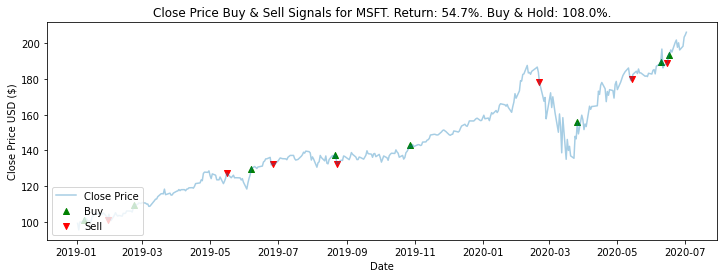

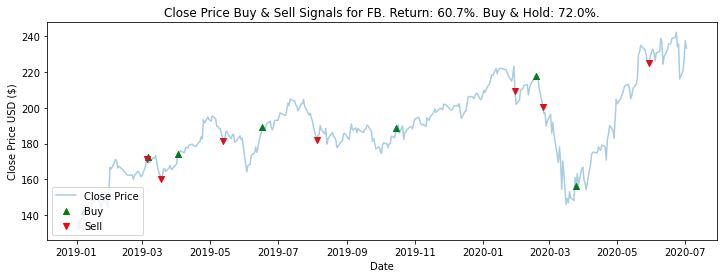

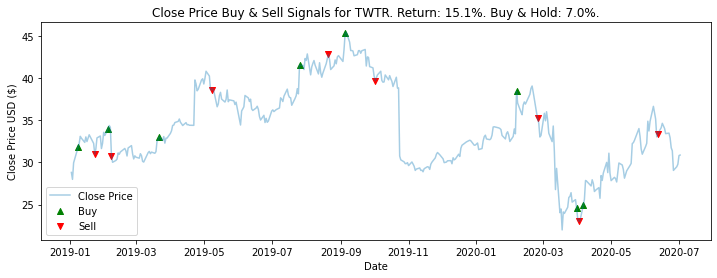

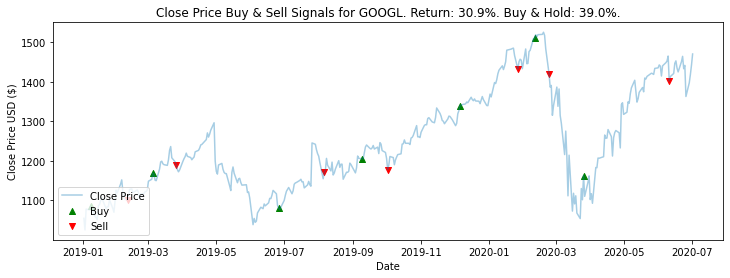

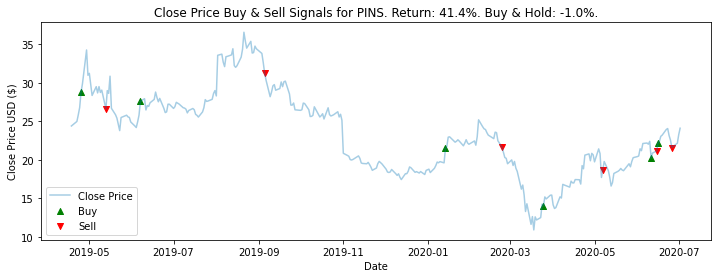

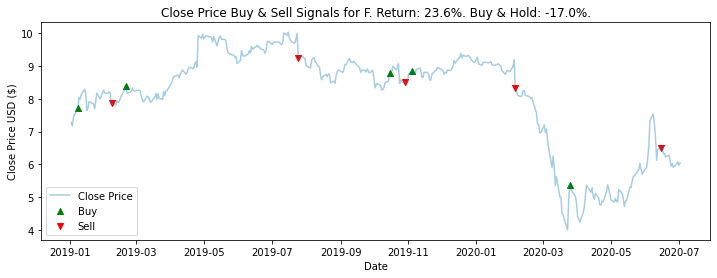

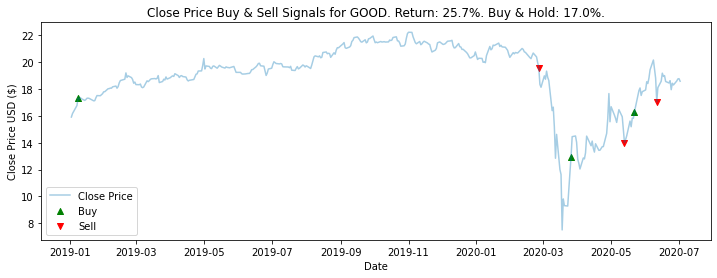

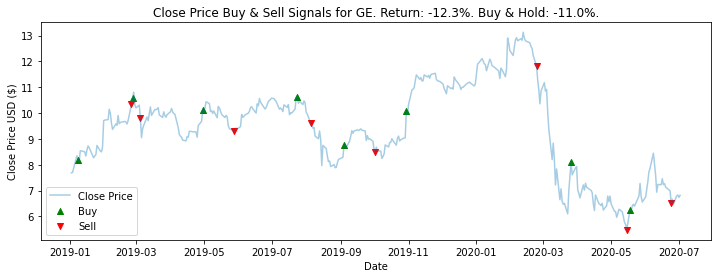

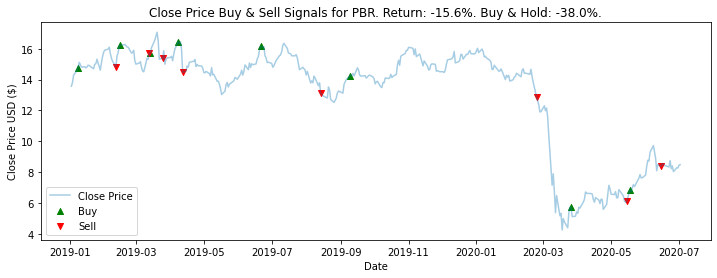

In [434]:
#actions('PINS')

stocks = ['MSFT','FB','TWTR','GOOGL','PINS','F','GOOD','GE','PBR']
for stock in stocks:
    actions(stock)

## Conclusions
The last charts shows that for some accounts, the return is smaller (for the date executed), but for many of them, the return is superior, specially those with buy & hold with negative results. This methodology combining MACD with volatility in 5 days greater than average showed interesting positive results.